In [3]:
import pandas as pd



In [4]:
data = pd.read_csv('cost_revenue_clean.csv')

In [5]:
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data2 = pd.read_csv('lsd_math_score_data.csv')

In [8]:
print(data2)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [9]:
data2['LSD_ppm']

0    1.17
1    2.97
2    3.26
3    4.69
4    5.83
5    6.00
6    6.41
Name: LSD_ppm, dtype: float64

In [10]:
data2['High_Score'] = 100
data2

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,High_Score
0,5,1.17,78.93,100
1,15,2.97,58.20,100
2,30,3.26,67.47,100
3,60,4.69,37.47,100
4,120,5.83,45.65,100
5,240,6.00,32.92,100
6,480,6.41,29.97,100


In [11]:
data2['High_Score'] += data2['Avg_Math_Test_Score']

In [12]:
data2

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,High_Score
0,5,1.17,78.93,178.93
1,15,2.97,58.20,158.20
2,30,3.26,67.47,167.47
3,60,4.69,37.47,137.47
4,120,5.83,45.65,145.65
5,240,6.00,32.92,132.92
6,480,6.41,29.97,129.97


In [13]:
data2['High_Score'] = data2['High_Score']**2

In [14]:
data2
type(data2)

pandas.core.frame.DataFrame

In [15]:
only_High_Score = data2['High_Score']
type(only_High_Score)

pandas.core.series.Series

In [16]:
cols = ['High_Score','LSD_ppm']
data2[cols]

,High_Score,LSD_ppm
0,32015.9449,1.17
1,25027.2400,2.97
2,28046.2009,3.26
3,18898.0009,4.69
4,21213.9225,5.83
5,17667.7264,6.00
6,16892.2009,6.41


In [17]:
new = data2[cols]
type(new)

pandas.core.frame.DataFrame

In [18]:
y = data2[['LSD_ppm']]
type(y)

pandas.core.frame.DataFrame

In [19]:
data2['Test'] = 'Jenny'
data2

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,High_Score,Test
0,5,1.17,78.93,32015.9449,Jenny
1,15,2.97,58.20,25027.2400,Jenny
2,30,3.26,67.47,28046.2009,Jenny
3,60,4.69,37.47,18898.0009,Jenny
4,120,5.83,45.65,21213.9225,Jenny
5,240,6.00,32.92,17667.7264,Jenny
6,480,6.41,29.97,16892.2009,Jenny


In [20]:
del data2['Test']
data2

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,High_Score
0,5,1.17,78.93,32015.9449
1,15,2.97,58.20,25027.2400
2,30,3.26,67.47,28046.2009
3,60,4.69,37.47,18898.0009
4,120,5.83,45.65,21213.9225
5,240,6.00,32.92,17667.7264
6,480,6.41,29.97,16892.2009


In [21]:
data2

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score,High_Score
0,5,1.17,78.93,32015.9449
1,15,2.97,58.20,25027.2400
2,30,3.26,67.47,28046.2009
3,60,4.69,37.47,18898.0009
4,120,5.83,45.65,21213.9225
5,240,6.00,32.92,17667.7264
6,480,6.41,29.97,16892.2009


In [25]:
time = data2[["Time_Delay_in_Minutes"]]

In [26]:
time

,Time_Delay_in_Minutes
0,5
1,15
2,30
3,60
4,120
5,240
6,480


In [28]:
LSD = data2[["LSD_ppm"]]

In [29]:
score = data2[["Avg_Math_Test_Score"]]

In [32]:
from sklearn.linear_model import LinearRegression as LR

In [60]:
regr = LR()
regr.fit(LSD, score)
print("Theta1(slope): ",regr.coef_[0][0])
print("Theta0(Intercept): ",regr.intercept_[0])
print("R-square: ",regr.score(LSD,score))


predicted_score = regr.predict(LSD)

Theta1(slope):  -9.009466415296785
Theta0(Intercept):  89.12387376799308
R-square:  0.8778349707775889


In [44]:
import matplotlib.pyplot as plt

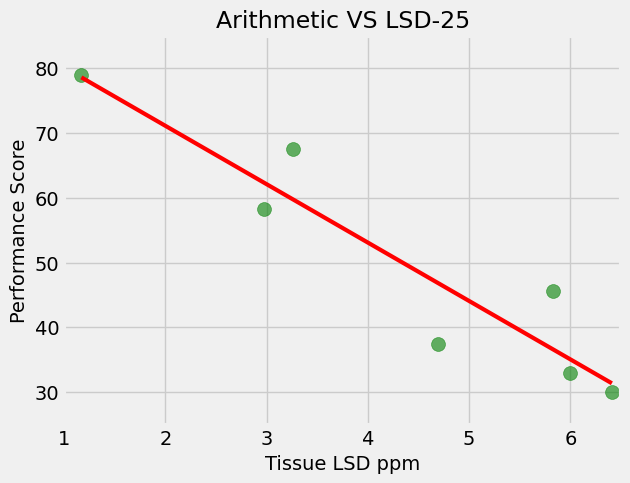

In [62]:
plt.scatter(LSD,score, color = 'g',s = 100, alpha = 0.6)
plt.plot(LSD, predicted_score, color = 'r', linewidth = 3)

plt.title("Arithmetic VS LSD-25", fontsize = 17)
plt.xlabel("Tissue LSD ppm", fontsize = 14)
plt.ylabel("Performance Score", fontsize = 14)
plt.ylim(25,85)
plt.xlim(1,6.5)
plt.style.use('fivethirtyeight')
plt.show()